In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("Housing.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
Continuous Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
mean_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = mean_imputer.fit_transform(df[numerical_columns])

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
# Apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
print(df.dtypes)

price                 float64
area                  float64
bedrooms              float64
bathrooms             float64
stories               float64
parking               float64
mainroad_1               bool
guestroom_1              bool
basement_1               bool
hotwaterheating_1        bool
airconditioning_1        bool
prefarea_1               bool
furnishingstatus_1       bool
furnishingstatus_2       bool
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               545 non-null    float64
 1   area                545 non-null    float64
 2   bedrooms            545 non-null    float64
 3   bathrooms           545 non-null    float64
 4   stories             545 non-null    float64
 5   parking             545 non-null    float64
 6   mainroad_1          545 non-null    bool   
 7   guestroom_1         545 non-null    bool   
 8   basement_1          545 non-null    bool   
 9   hotwaterheating_1   545 non-null    bool   
 10  airconditioning_1   545 non-null    bool   
 11  prefarea_1          545 non-null    bool   
 12  furnishingstatus_1  545 non-null    bool   
 13  furnishingstatus_2  545 non-null    bool   
dtypes: bool(8), float64(6)
memory usage: 29.9 KB


<Axes: xlabel='price'>

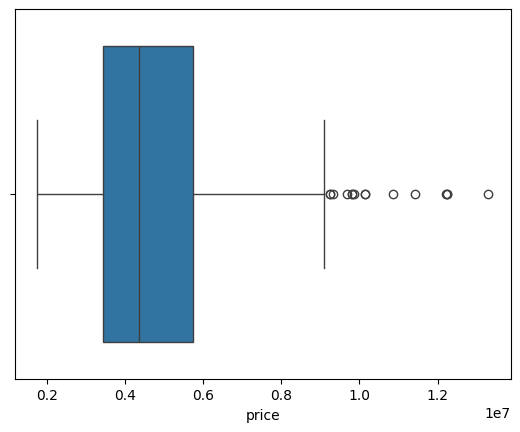

In [ ]:
sns.boxplot(x='price',data=df)

In [ ]:
#Outliers removal
print(df['price'].quantile(0.05))
print(df['price'].quantile(0.95))

2450000.0
8400000.0


In [ ]:
df['price']=np.where(df['price']>8400000.0,8400000.0,df['price'])
df['price']=np.where(df['price']<2450000.0,2450000.0,df['price'])

<Axes: ylabel='price'>

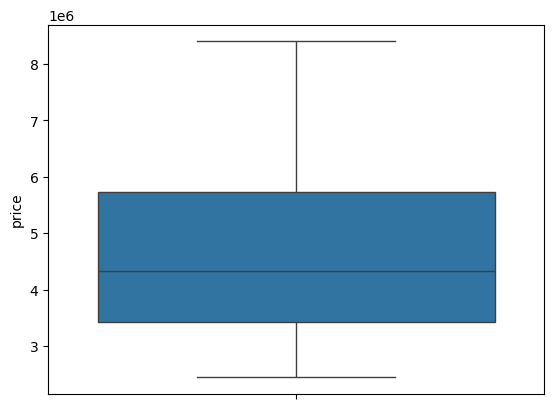

In [ ]:
sns.boxplot(df['price'])

<Axes: xlabel='area'>

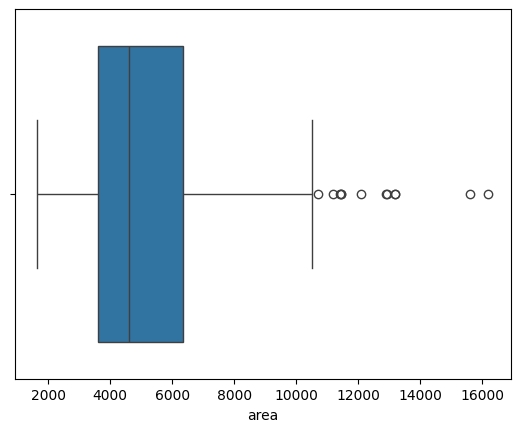

In [22]:
sns.boxplot(x='area',data=df)

In [23]:
print(df['area'].quantile(0.05))
print(df['area'].quantile(0.95))

2562.0
9000.0


In [24]:
df['area']=np.where(df['area']>9000.0,9000.0,df['area'])
df['area']=np.where(df['area']<2562.0,2562.0,df['area'])

<Axes: ylabel='area'>

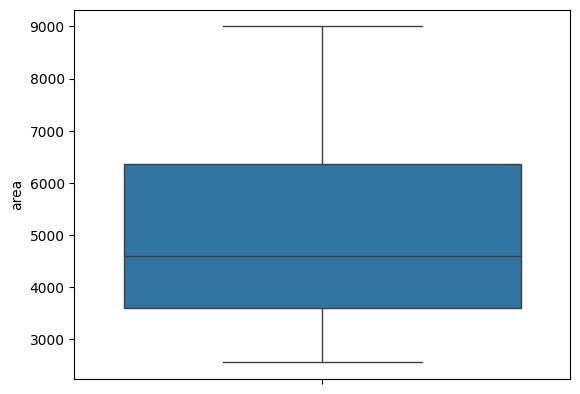

In [25]:
sns.boxplot(df['area'])

<Axes: xlabel='bedrooms'>

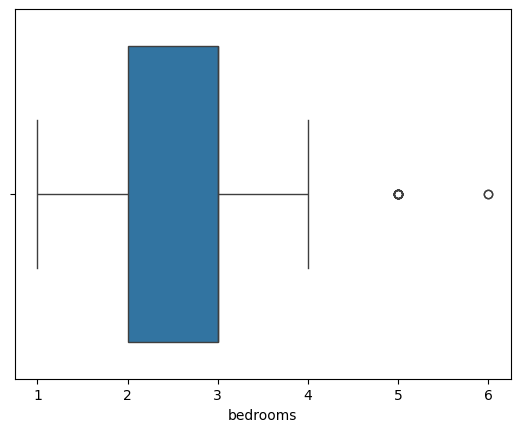

In [26]:
sns.boxplot(x='bedrooms',data=df)

In [27]:
print(df['bedrooms'].quantile(0.05))
print(df['bedrooms'].quantile(0.95))

2.0
4.0


In [28]:
df['bedrooms']=np.where(df['bedrooms']>4.0,4.0,df['bedrooms'])
df['bedrooms']=np.where(df['bedrooms']<2.0,2.0,df['bedrooms'])

<Axes: ylabel='bedrooms'>

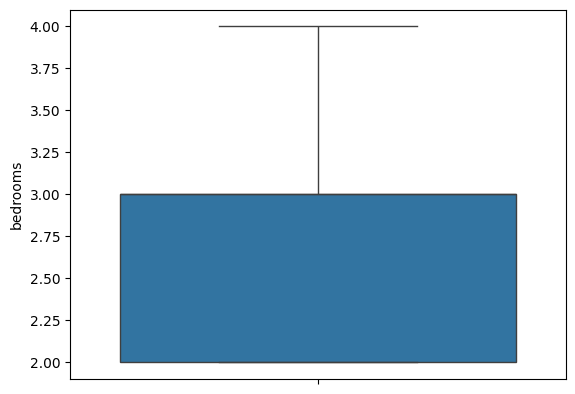

In [29]:
sns.boxplot(df['bedrooms'])

<Axes: xlabel='bathrooms'>

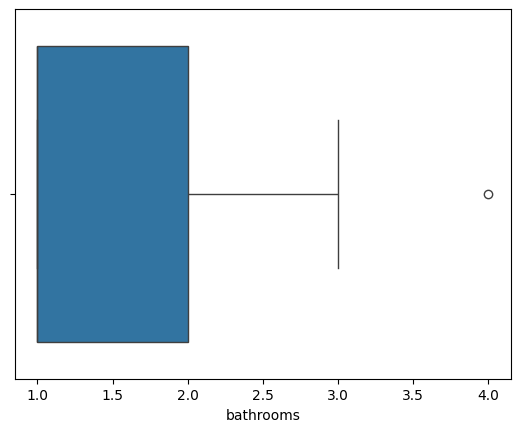

In [30]:
sns.boxplot(x='bathrooms',data=df)

In [31]:
print(df['bathrooms'].quantile(0.05))
print(df['bathrooms'].quantile(0.95))

1.0
2.0


In [32]:
df['bathrooms']=np.where(df['bathrooms']>2.0,2.0,df['bathrooms'])
df['bathrooms']=np.where(df['bathrooms']<1.0,1.0,df['bathrooms'])

<Axes: ylabel='bathrooms'>

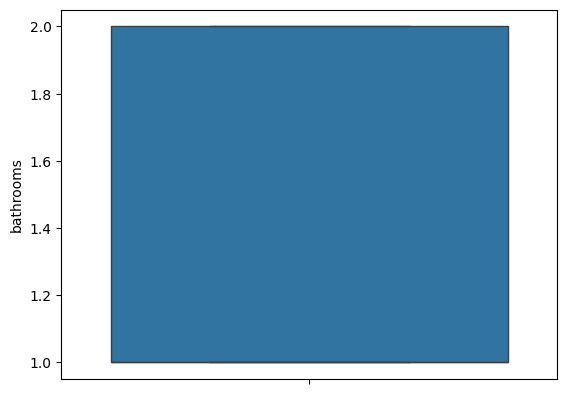

In [33]:
sns.boxplot(df['bathrooms'])

<Axes: xlabel='stories'>

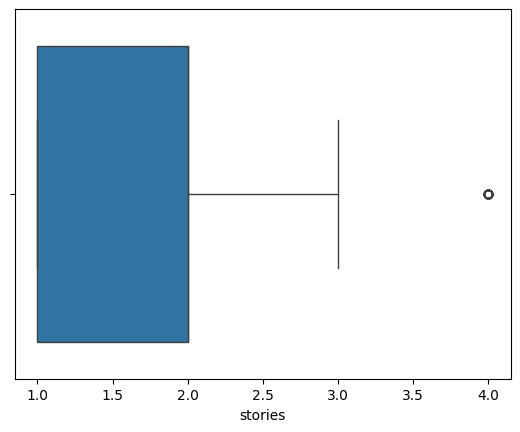

In [34]:
sns.boxplot(x='stories',data=df)

In [38]:
print(df['stories'].quantile(0.05))
print(df['stories'].quantile(0.95))

1.0
4.0


In [39]:
df['stories']=np.where(df['stories']>4.0,4.0,df['stories'])
df['stories']=np.where(df['stories']<1.0,1.0,df['stories'])

<Axes: ylabel='stories'>

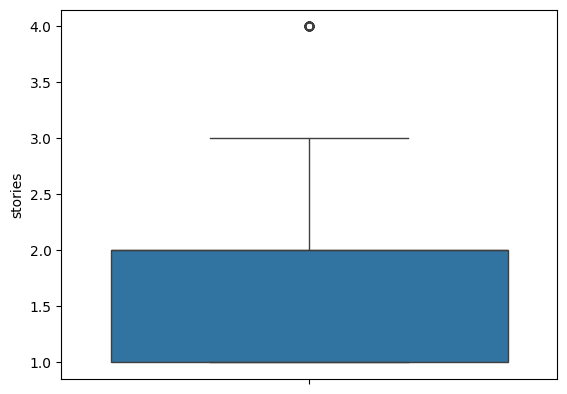

In [40]:
sns.boxplot(df['stories'])

In [42]:
print(df['stories'].quantile(0.10))
print(df['stories'].quantile(0.90))

1.0
3.0


In [43]:
df['stories']=np.where(df['stories']>3.0,3.0,df['stories'])
df['stories']=np.where(df['stories']<1.0,1.0,df['stories'])

<Axes: ylabel='stories'>

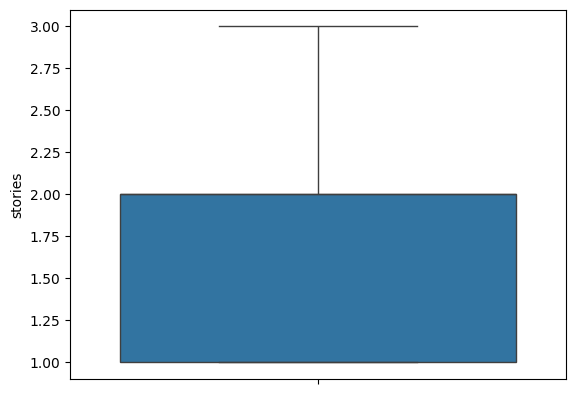

In [44]:
sns.boxplot(df['stories'])

<Axes: xlabel='parking'>

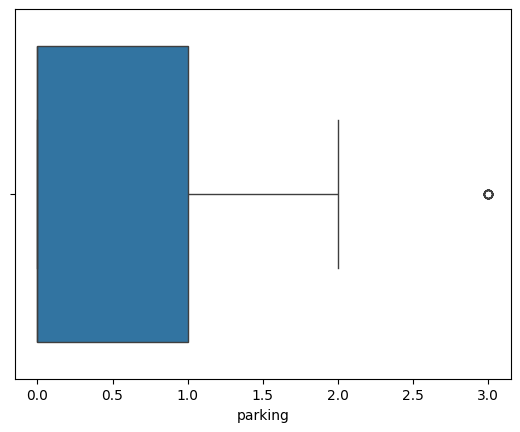

In [46]:
sns.boxplot(x='parking',data=df)

In [47]:
print(df['parking'].quantile(0.10))
print(df['parking'].quantile(0.90))

0.0
2.0


In [48]:
df['parking']=np.where(df['parking']>2.0,2.0,df['parking'])
df['parking']=np.where(df['parking']<0.0,0.0,df['parking'])

<Axes: ylabel='parking'>

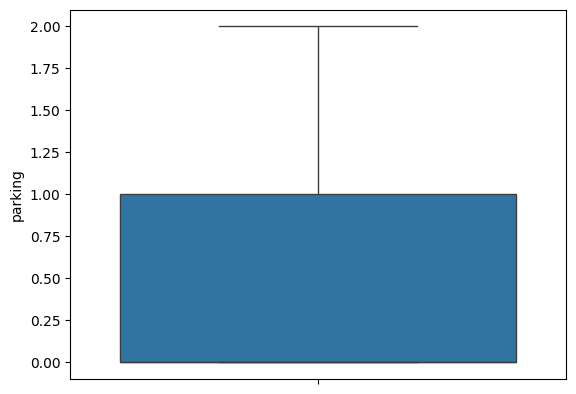

In [49]:
sns.boxplot(df['parking'])

 Split Data into Train-Test Sets


In [51]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


MAE: 824458.777739718
MSE: 1099982468555.918
R²: 0.6795349217482489


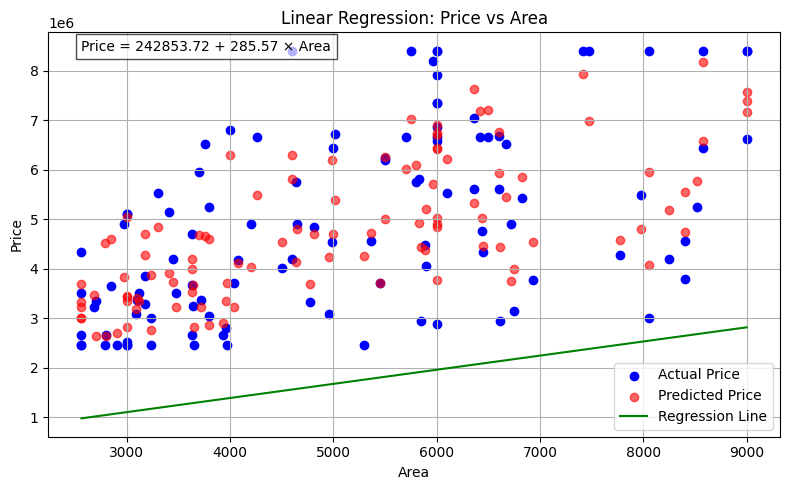

In [61]:
# Get coefficient and intercept for 'area'
area_index = X.columns.get_loc('area')
area_coef = model.coef_[area_index]
intercept = model.intercept_

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted Price', alpha=0.6)

# Regression line
x_vals = np.linspace(X_test['area'].min(), X_test['area'].max(), 100)
y_vals = intercept + area_coef * x_vals
plt.plot(x_vals, y_vals, color='green', label='Regression Line')

# Axis labels and title
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Area')

# Equation text on plot
equation = f"Price = {intercept:.2f} + {area_coef:.2f} × Area"
plt.text(x_vals.min(), y_test.max(), equation, fontsize=10, color='black',
         bbox=dict(facecolor='white', alpha=0.7))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
